# Correlation Analysis

<Axes: >

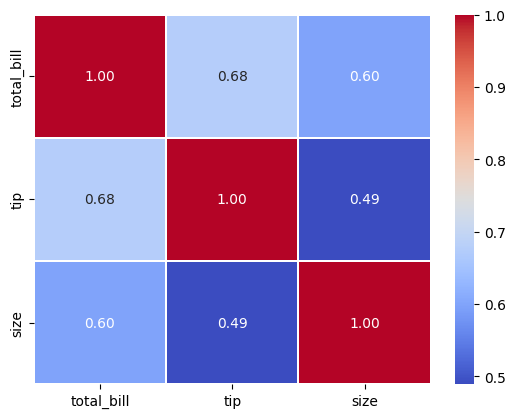

In [ ]:
import seaborn as sns
tips=sns.load_dataset('tips')
numeric_tips=tips[['total_bill','tip','size']]
correlation_matrix=numeric_tips.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linecolor='w',linewidth=0.3)

<Axes: >

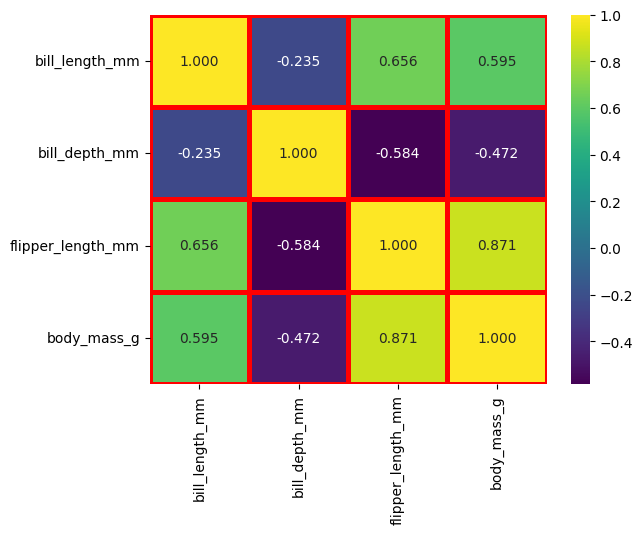

In [ ]:
df=sns.load_dataset('penguins')
numeric_tips=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
corr=numeric_tips.corr()
sns.heatmap(corr,annot=True,fmt='.3f',cmap='viridis',linewidth=2.5,linecolor='red')

# Min-Max Scaling Visualization

<Axes: xlabel='total_bill', ylabel='Count'>

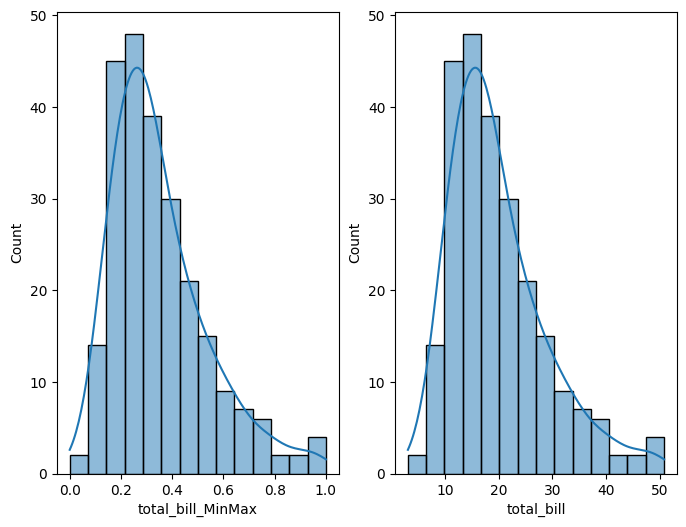

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
tips=sns.load_dataset('tips')
scaler_minmax=MinMaxScaler()
tips['total_bill_MinMax']=scaler_minmax.fit_transform(tips[['total_bill']])
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.histplot(tips['total_bill_MinMax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(tips['total_bill'],kde=True)

<Axes: xlabel='total_bill', ylabel='Count'>

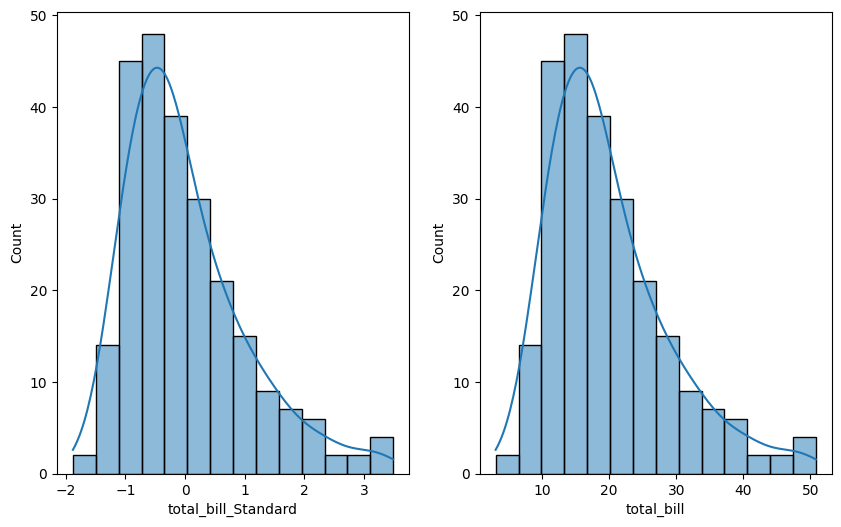

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')
scaler_standard=StandardScaler()
tips['total_bill_Standard']=scaler_standard.fit_transform(tips[['total_bill']])
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(tips['total_bill_Standard'],kde=True)
plt.subplot(1,2,2)
sns.histplot(tips['total_bill'],kde=True)

## Log Transformation Visualization

<Axes: xlabel='total_bill', ylabel='Count'>

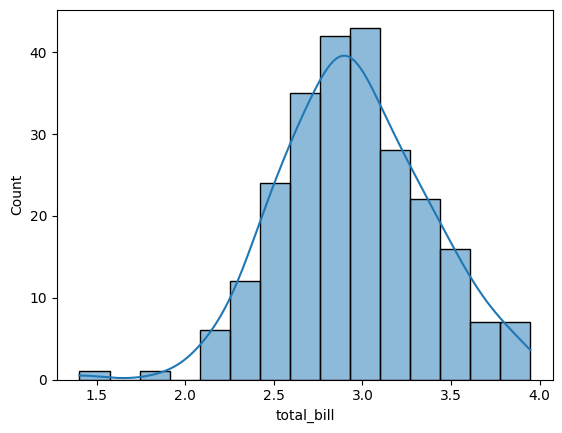

In [ ]:
import numpy as np
log_transformed=np.log(tips['total_bill']+1)
sns.histplot(log_transformed,kde=True)

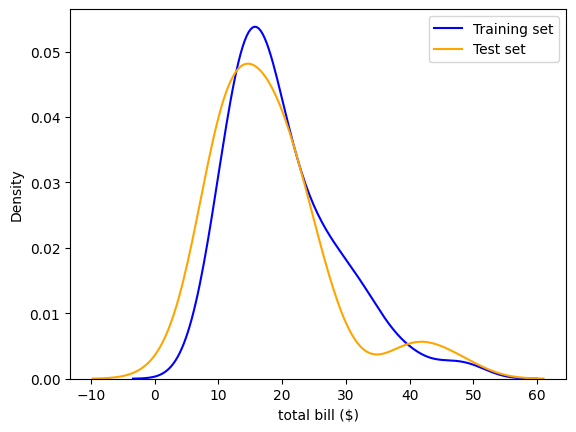

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
tips=sns.load_dataset('tips')
train_data,test_data=train_test_split(tips,test_size=0.2,random_state=42)
sns.kdeplot(train_data['total_bill'],color='blue',label='Training set',)
sns.kdeplot(test_data['total_bill'],color='orange',label='Test set')
plt.xlabel('total bill ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Confusion Matrix Heatmaps

<Axes: >

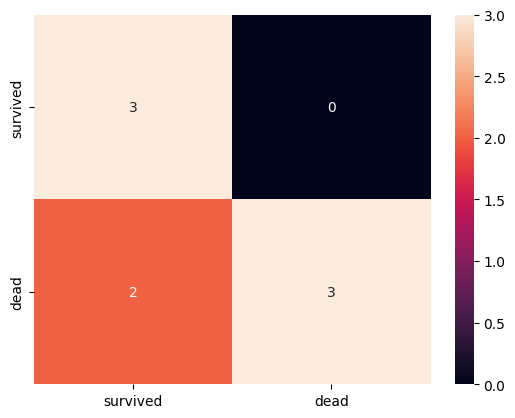

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true=['survived','dead','dead','survived','dead','dead','survived','dead']
y_pred=['survived','dead','survived','survived','dead','dead','survived','survived']
cm=confusion_matrix(y_true,y_pred,labels=['survived','dead'])
sns.heatmap(cm,annot=True,fmt='d',
            xticklabels=['survived','dead'],
            yticklabels=['survived','dead'])

<Axes: >

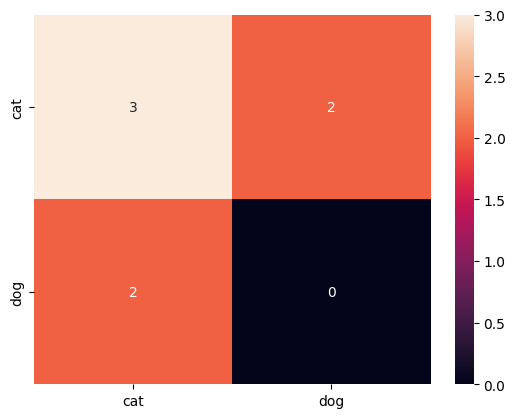

In [ ]:
y_true=['cat','dog','cat','dog','cat','cat','cat']
y_pred=['dog','cat','cat','cat','cat','dog','cat']

cm=confusion_matrix(y_true,y_pred,labels=['cat','dog'])
sns.heatmap(cm,annot=True,fmt='d',
            xticklabels=['cat','dog'],
            yticklabels=['cat','dog'])

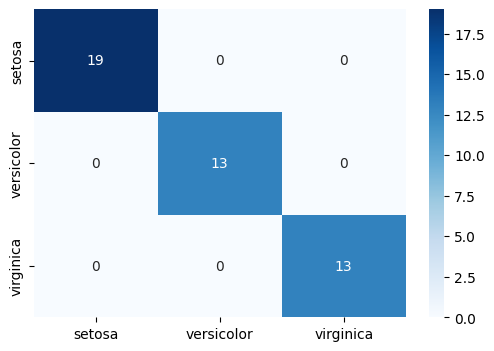

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

iris=sns.load_dataset('iris')
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris['species']

le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.show()

# Residual Plot

TypeError: Exactly one of 'xy2' and 'slope' must be given

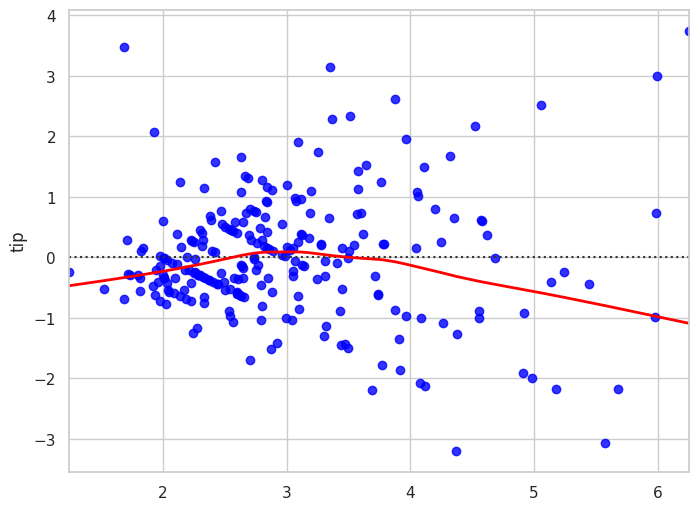

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

tips = sns.load_dataset('tips')

X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X,y)


y_pred = model.predict(X)

residuals = y-y_pred

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True,color='blue',line_kws={'color':'red','lw':2})
plt.axline(0,linestyle='--',color='grey',linewidth=1)
plt.show()